### Exploratory data analysis for Semantic Segmentation van MRI breinscans 

### Imports

In [1]:
import numpy as np
import nibabel as nib 
import glob 
import tensorflow as tf
import keras.utils as ks
#from tf.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tifffile import imsave
import random

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

### Laad de data

Er zijn al training en validation data beschikbaar gemaakt:

In [2]:
TRAIN_DATASET_PATH = '../data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/'
VALIDATION_DATASET_PATH = '../data/BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData'

We gaan eerst de data testen met met 1 directory. We gebruiken nib.load, dit laad de .nii bestanden in met meerdere "slices" in  3D. Deze worden omgezet in numbpy arrays om de data beter beschikbaar te maken met het scalen. Het resulterende array heeft (240, 240, 115). Dat is dus een slice in een 2D beeld (240 x 240) en het aantal slices in een 3D stack (115). 

In [3]:
# Load the .nii files and shape it to be numpy array.
test_image_flair=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_flair.nii').get_fdata()
#Scalers are applied to 1D so let us reshape and then reshape back to original shape. 

print("Data type:", test_image_flair.dtype)
print("Shape:", test_image_flair.shape)
print("Min:", test_image_flair.min(), "Max:", test_image_flair.max())

Data type: float64
Shape: (240, 240, 155)
Min: 0.0 Max: 1854.603271484375


De data is aangeleverd in de 3D vorm en moet dus nog gescaled worden. Hierom moeten we de data eerst reshapen naar 2D (-1, 1) om de scaler te gebruiken. Dan schaalen we de data door MinMaxScaler te gebruiken. Tot slot reshapen we terug naar de originele 3D vorm. Dit zal worden herhaald voor alle modaliteiten (flair, t1, t1ce, t2). De masks daarintegen moeten niet gescaled worden, echter moeten de labels wel aangepast worden. Geen enkele pixel wordt assigned aan label 3, dus die wordt vervangen met label 4. 

In [4]:
test_image_flair=scaler.fit_transform(test_image_flair.reshape(-1, test_image_flair.shape[-1]))
tes_image_flair = test_image_flair.reshape(test_image_flair.shape)

test_image_t1=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_t1.nii').get_fdata()
test_image_t1=scaler.fit_transform(test_image_t1.reshape(-1, test_image_t1.shape[-1])).reshape(test_image_t1.shape)

test_image_t1ce=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_t1ce.nii').get_fdata()
test_image_t1ce=scaler.fit_transform(test_image_t1ce.reshape(-1, test_image_t1ce.shape[-1])).reshape(test_image_t1ce.shape)

test_image_t2=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_t2.nii').get_fdata()
test_image_t2=scaler.fit_transform(test_image_t2.reshape(-1, test_image_t2.shape[-1])).reshape(test_image_t2.shape)

test_mask=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_seg.nii').get_fdata()
test_mask=test_mask.astype(np.uint8)

print(np.unique(test_mask))  #0, 1, 2, 4 (Need to reencode to 0, 1, 2, 3)
test_mask[test_mask==4] = 3  #Reassign mask values 4 to 3
print(np.unique(test_mask)) 

[0 1 2 4]
[0 1 2 3]


### Visualisations 

Now let's see the images:

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

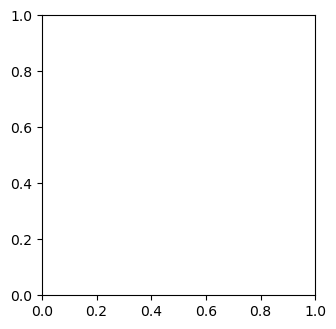

In [6]:
n_slice=random.randint(0, test_mask.shape[2])

plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.imshow(test_image_flair[:,:,n_slice], cmap='gray')
plt.title('Image flair')
plt.subplot(232)
plt.imshow(test_image_t1[:,:,n_slice], cmap='gray')
plt.title('Image t1')
plt.subplot(233)
plt.imshow(test_image_t1ce[:,:,n_slice], cmap='gray')
plt.title('Image t1ce')
plt.subplot(234)
plt.imshow(test_image_t2[:,:,n_slice], cmap='gray')
plt.title('Image t2')
plt.subplot(235)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()